<a href="https://colab.research.google.com/github/Priyanka17panda/Zidio_Internship/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The dataset includes the following columns:

#Date: The date on which the stock market data was recorded.
#Open: The opening price of the asset on the given date.
#High: The highest price of the asset on the given date.
#Low: The lowest price of the asset on the given date.
#Close: The closing price of the asset on the given date. Note that this price does not take into account any after-hours trading that may have occurred after the market officially closed.
#Volume: The total number of shares of the asset that were traded on the given date.

In [ ]:
!pip install yfinance

In [ ]:
import numpy as np

In [ ]:
import yfinance as yf

# Download JPM data (no multi-level columns)
df = yf.download("JPM", start="2020-01-01", end="2025-05-20")

# Reset index to move 'Date' from index to a column
df.reset_index(inplace=True)
# Keep only required columns and rename if needed
df.columns = df.columns.droplevel(1)  # Drop 'JPM' level

# Save clean CSV
df.to_csv("JPM_clean.csv", index=False)



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
import pandas as pd

# Load the dataset (replace with your actual filename)
df = pd.read_csv("JPM_clean.csv")  # or "JPM_final_clean.csv"

# Show first 5 rows
print(df.head(10))

# Show dataset shape (rows, columns)
print("Dataset shape:", df.shape)

# Show column names
print("Columns:", df.columns.tolist())


         Date       Close        High         Low        Open    Volume
0  2020-01-02  120.733582  120.742147  119.167612  119.621142  10803700
1  2020-01-03  119.140320  119.906800  118.055195  118.416903  10386800
2  2020-01-06  119.045609  119.080064  117.555712  117.607383  10259000
3  2020-01-07  117.021744  118.726944  116.970073  118.227438  10531300
4  2020-01-08  117.934631  118.485808  116.780608  116.866721   9695300
5  2020-01-09  118.365211  119.045565  118.020718  118.890552   9469000
6  2020-01-10  117.185364  118.201590  116.961440  118.167147  10190900
7  2020-01-13  118.158546  118.158546  116.918396  117.288725  12355200
8  2020-01-14  119.536461  121.224432  118.580513  118.795817  24906000
9  2020-01-15  117.745178  119.364265  117.254280  118.718354  16293400
Dataset shape: (1352, 6)
Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']


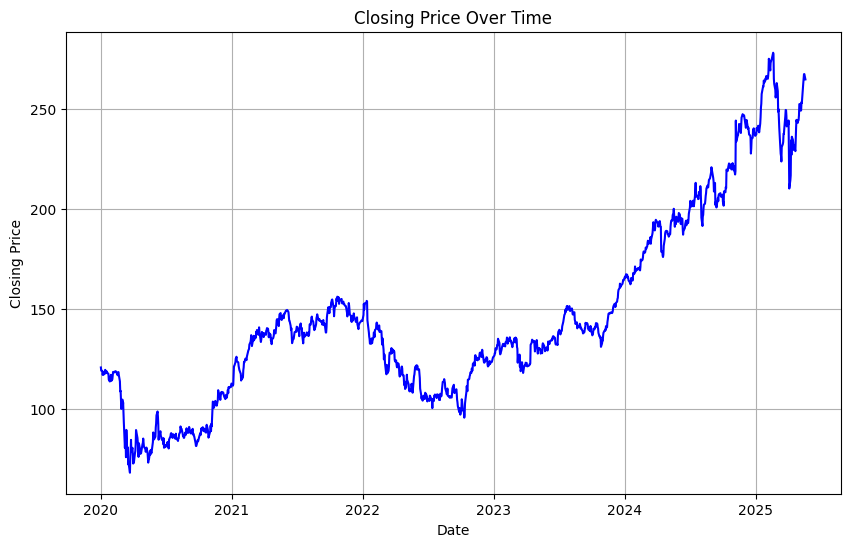

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Assuming 'data' is your DataFrame containing the Yahoo Finance dataset
# You might need to adjust this depending on how you've loaded your data

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the closing price of the asset over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], color='blue')  # Using 'Close*' column
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1352 non-null   datetime64[ns]
 1   Close   1352 non-null   float64       
 2   High    1352 non-null   float64       
 3   Low     1352 non-null   float64       
 4   Open    1352 non-null   float64       
 5   Volume  1352 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 63.5 KB


In [ ]:
#Candlestick-like OHLC Plot
#Helps to visualize open, high, low, and close.

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_layout(title='JPM Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()


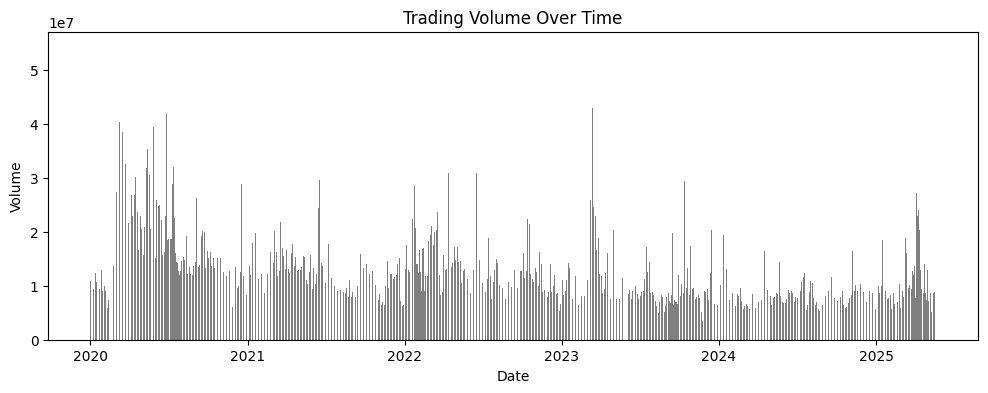

In [ ]:
#Volume Over Time
#Spikes in volume often indicate important events or high volatility
plt.figure(figsize=(12, 4))
plt.bar(df['Date'], df['Volume'], color='gray')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


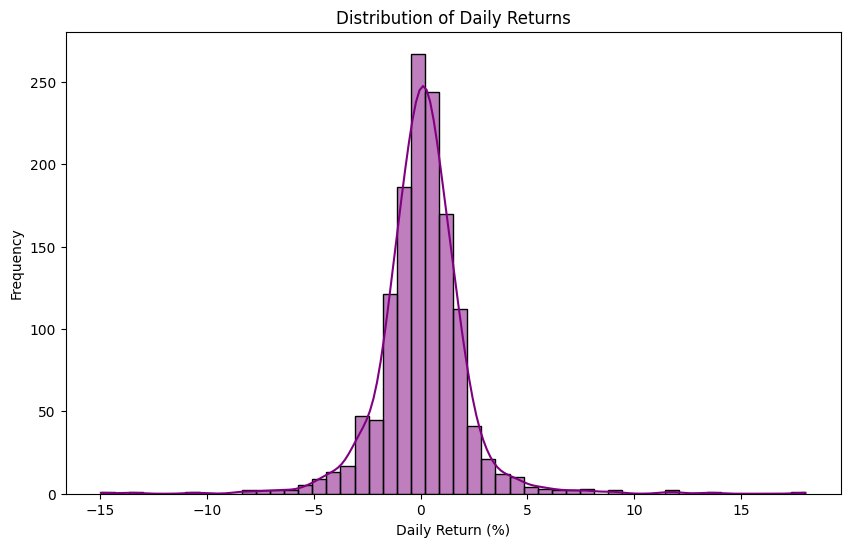

In [ ]:
#Daily Returns Histogram
#Shows distribution of daily percentage changes in closing price.
import seaborn as sns
df['Daily Return (%)'] = df['Close'].pct_change() * 100
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return (%)'].dropna(), bins=50, kde=True, color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()


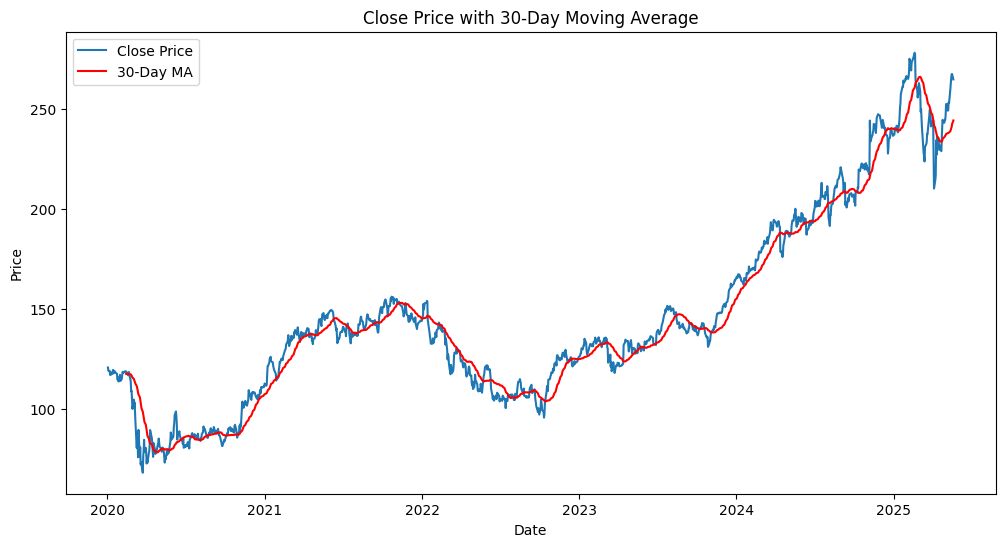

In [ ]:
#Rolling Average (e.g., 30-Day Moving Average)
#Smooths price to show long-term trend.

df['30D MA'] = df['Close'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['30D MA'], label='30-Day MA', color='red')
plt.title('Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


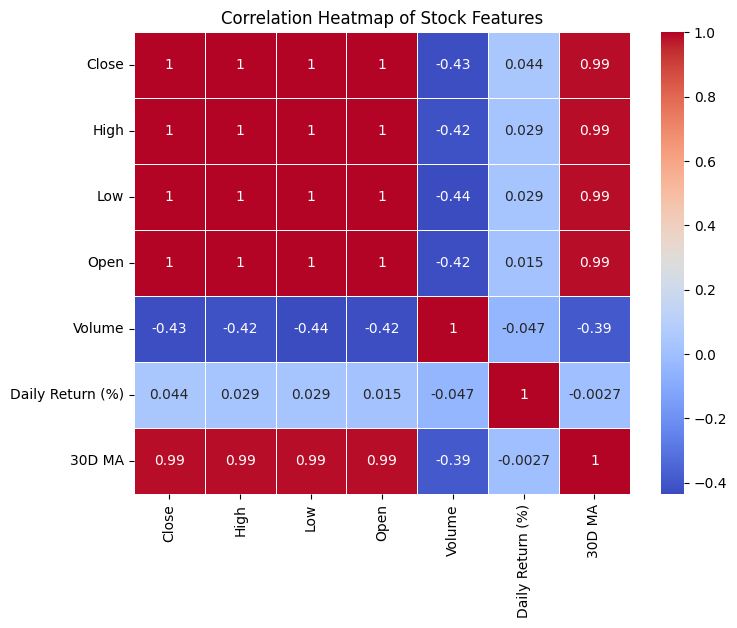

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded and 'Date' is not needed for correlation
numeric_df = df.drop(columns=['Date'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Stock Features")
plt.show()


In [ ]:
# Ensure 'Date' is the index for these models
df_ts = df.copy()
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
df_ts.set_index('Date', inplace=True)

# Drop other columns for these univariate models
df_ts = df_ts[['Close']]

# Split into training and testing sets based on time
train_size = int(len(df_ts) * 0.8)
train_data, test_data = df_ts[0:train_size], df_ts[train_size:]


In [ ]:
# --- ARIMA Model ---
print("Applying ARIMA Model...")
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

try:
    arima_model = ARIMA(train_data, order=(5,1,0)) # Example order (p,d,q)
    arima_model_fit = arima_model.fit()

    # Make predictions
    arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(df_ts)-1)

    # Evaluate
    mse = mean_squared_error(test_data, arima_predictions)
    arima_rmse = np.sqrt(mse)
    print(f'ARIMA RMSE: {arima_rmse}')
except Exception as e:
    print(f"ARIMA model failed: {e}")


Applying ARIMA Model...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA RMSE: 54.168536147117486


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


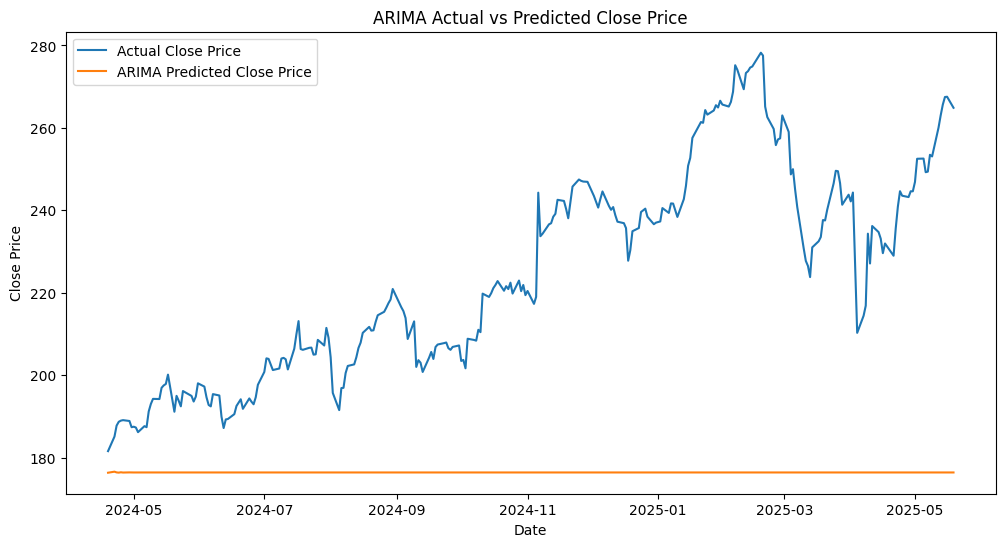

In [ ]:
# Visualize ARIMA Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Close Price')
plt.plot(test_data.index, arima_predictions, label='ARIMA Predicted Close Price')
plt.title('ARIMA Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
print("\nApplying Prophet Model...")
!pip install prophet


Applying Prophet Model...


In [ ]:
# --- SARIMA Model ---
print("\nApplying SARIMA Model...")
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error # Make sure this is imported

# Fit SARIMA model
# You'll likely need to find appropriate p,d,q, P,D,Q,s values
# The example order (1, 1, 1) and seasonal_order (1, 1, 1, 12) are placeholders.
# You may need to determine the correct order for your specific data.
try:
    sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_model_fit = sarima_model.fit(disp=False)

    # Make predictions
    sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(df_ts)-1)

    # Evaluate
    mse = mean_squared_error(test_data, sarima_predictions)
    sarima_rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
    print(f'SARIMA RMSE: {sarima_rmse}')
except Exception as e:
    print(f"SARIMA model failed: {e}")


Applying SARIMA Model...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA RMSE: 35.92213540760873


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


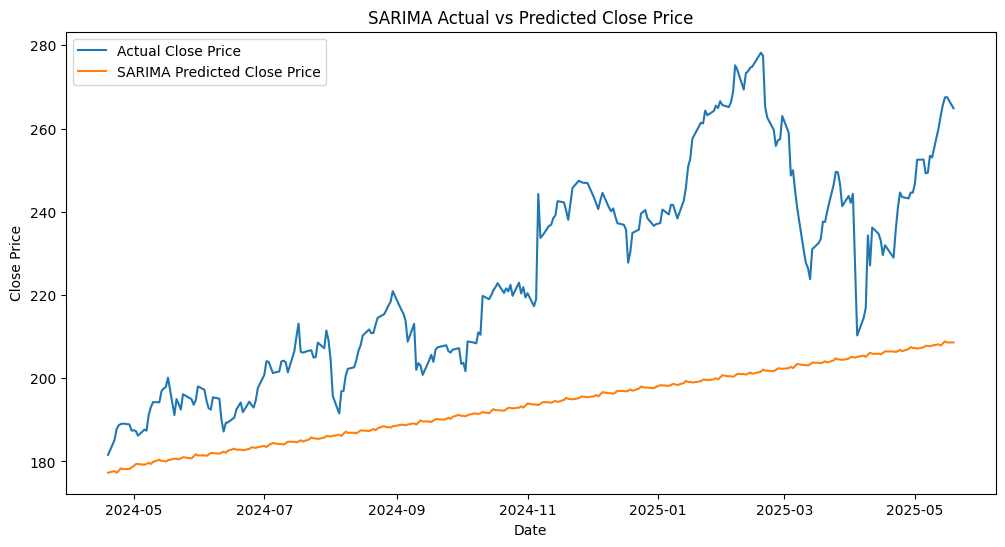

In [ ]:
# Visualize SARIMA Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Close Price')
plt.plot(test_data.index, sarima_predictions, label='SARIMA Predicted Close Price')
plt.title('SARIMA Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
from prophet import Prophet

# Prepare data for Prophet (requires 'ds' and 'y' columns)
prophet_train_df = train_data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_test_df = test_data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})

# Fit Prophet model
try:
    prophet_model = Prophet()
    prophet_model.fit(prophet_train_df)

    # Make predictions
    future = prophet_model.make_future_dataframe(periods=len(test_data))
    prophet_forecast = prophet_model.predict(future)

    # Extract predictions for the test period
    prophet_predictions = prophet_forecast['yhat'].iloc[-len(test_data):]

    # Evaluate
    mse = mean_squared_error(prophet_test_df['y'], prophet_predictions)
    prophet_rmse = np.sqrt(mse)
    print(f'Prophet RMSE: {prophet_rmse}')
except Exception as e:
    print(f"Prophet model failed: {e}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ay3hpg5/nf2bos5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ay3hpg5/9a2yn2wf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31464', 'data', 'file=/tmp/tmp9ay3hpg5/nf2bos5w.json', 'init=/tmp/tmp9ay3hpg5/9a2yn2wf.json', 'output', 'file=/tmp/tmp9ay3hpg5/prophet_modelajglbht2/prophet_model-20250612163451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:34:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:34:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 33.57442917523464


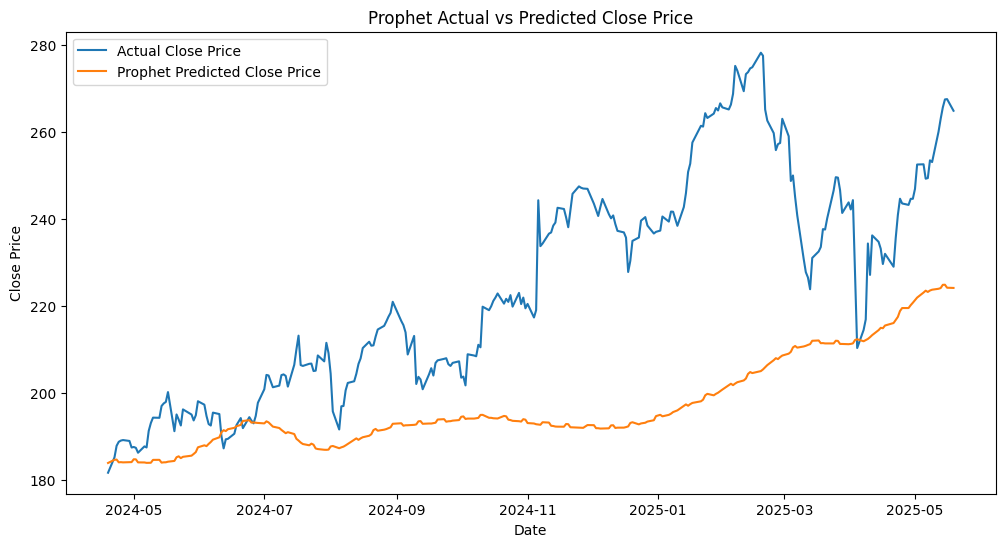

In [ ]:
# Visualize Prophet Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(prophet_test_df['ds'], prophet_test_df['y'], label='Actual Close Price')
plt.plot(prophet_test_df['ds'], prophet_predictions, label='Prophet Predicted Close Price')
plt.title('Prophet Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# For KNN, we can use the previous day's close price to predict the next day's
# We need to align the data for prediction
knn_df = df[['Close']].copy()
knn_df['Close_Prev'] = knn_df['Close'].shift(1)
knn_df.dropna(inplace=True)

X_knn = knn_df[['Close_Prev']]
y_knn = knn_df['Close']

# Split data based on the same time split as before for consistency
train_size_knn = int(len(X_knn) * 0.8)
X_train_knn, X_test_knn = X_knn[:train_size_knn], X_knn[train_size_knn:]
y_train_knn, y_test_knn = y_knn[:train_size_knn], y_knn[train_size_knn:]

try:
    knn_model = KNeighborsRegressor(n_neighbors=5) # You can adjust the number of neighbors
    knn_model.fit(X_train_knn, y_train_knn)

    # Make predictions
    knn_predictions = knn_model.predict(X_test_knn)

    # Evaluate
    mse_knn = mean_squared_error(y_test_knn, knn_predictions)
    knn_rmse = np.sqrt(mse_knn)
    print(f'KNN RMSE: {knn_rmse}')
except Exception as e:
    print(f"KNN model failed: {e}")

KNN RMSE: 40.163804326254855


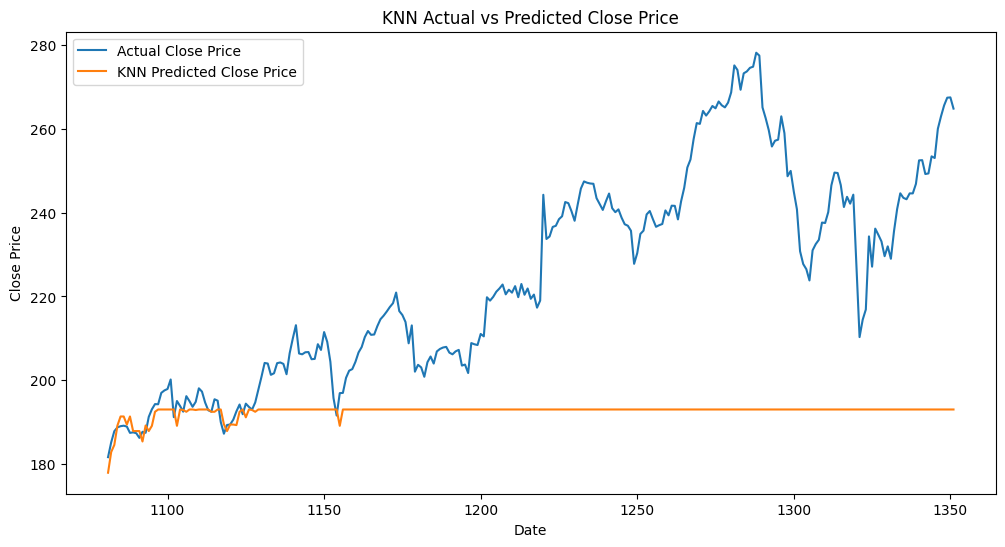

In [ ]:
# Visualize KNN Actual vs Predicted Prices
plt.figure(figsize=(12, 6))

# Get the dates for the test set from the knn_df index
knn_test_dates = knn_df.index[train_size_knn:]

plt.plot(knn_test_dates, y_test_knn, label='Actual Close Price')
plt.plot(knn_test_dates, knn_predictions, label='KNN Predicted Close Price')
plt.title('KNN Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Use the same data preparation as for KNN
X_lr = knn_df[['Close_Prev']]
y_lr = knn_df['Close']

# Split data based on the same time split as before for consistency
train_size_lr = int(len(X_lr) * 0.8)
X_train_lr, X_test_lr = X_lr[:train_size_lr], X_lr[train_size_lr:]
y_train_lr, y_test_lr = y_lr[:train_size_lr], y_lr[train_size_lr:] # Corrected typo here

try:
    lr_model = LinearRegression()
    lr_model.fit(X_train_lr, y_train_lr)

    # Make predictions
    lr_predictions = lr_model.predict(X_test_lr)

    # Evaluate
    mse_lr = mean_squared_error(y_test_lr, lr_predictions)
    lr_rmse = np.sqrt(mse_lr)
    print(f'Linear Regression RMSE: {lr_rmse}')
except Exception as e:
    print(f"Linear Regression model failed: {e}")

Linear Regression RMSE: 3.9973556222395783


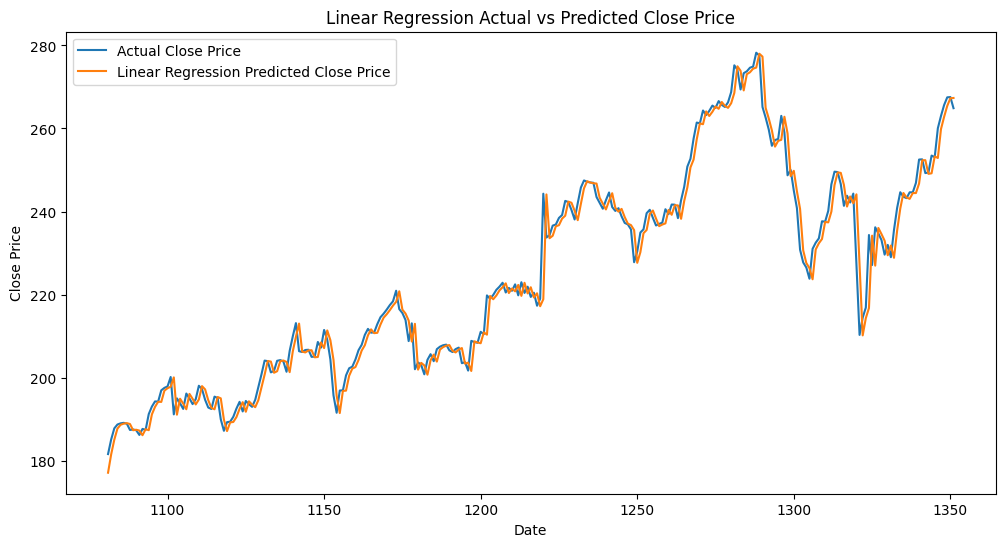

In [ ]:
# Visualize Linear Regression Actual vs Predicted Prices
plt.figure(figsize=(12, 6))

# Get the dates for the test set from the knn_df index
lr_test_dates = knn_df.index[train_size_lr:]

plt.plot(lr_test_dates, y_test_lr, label='Actual Close Price')
plt.plot(lr_test_dates, lr_predictions, label='Linear Regression Predicted Close Price')
plt.title('Linear Regression Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare data for RNN/ANN (using 'Close' price only for simplicity)
# Use the scaled data you already created, but select only the 'Close' column
scaled_close_data = scaled_data[:, -1].reshape(-1, 1) # Create scaled_close_data here

# Function to create sequences for RNN/ANN
def create_sequences_rnn_ann(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0]) # Take the sequence
        y.append(data[i + sequence_length, 0])     # Predict the next step
    return np.array(X), np.array(y)

sequence_length_rnn_ann = 60 # Use the same sequence length as LSTM

# Create sequences from the scaled close data
X_rnn_ann, y_rnn_ann = create_sequences_rnn_ann(scaled_close_data, sequence_length_rnn_ann)

# Time-based split
train_size_rnn_ann = int(len(X_rnn_ann) * 0.8)
X_train_rnn_ann, X_test_rnn_ann = X_rnn_ann[:train_size_rnn_ann], X_rnn_ann[train_size_rnn_ann:]
y_train_rnn_ann, y_test_rnn_ann = y_rnn_ann[:train_size_rnn_ann], y_rnn_ann[train_size_rnn_ann:]

# Reshape data for RNN (samples, time steps, features)
X_train_rnn_ann = np.reshape(X_train_rnn_ann, (X_train_rnn_ann.shape[0], X_train_rnn_ann.shape[1], 1))
X_test_rnn_ann = np.reshape(X_test_rnn_ann, (X_test_rnn_ann.shape[0], X_test_rnn_ann.shape[1], 1))

# Define the Simple RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train_rnn_ann.shape[1], 1)))
rnn_model.add(Dropout(0.2))
rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(units=1))

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_rnn = rnn_model.fit(X_train_rnn_ann, y_train_rnn_ann, epochs=50, batch_size=32, validation_data=(X_test_rnn_ann, y_test_rnn_ann), verbose=1)

# Evaluate the model
rnn_loss = rnn_model.evaluate(X_test_rnn_ann, y_test_rnn_ann, verbose=0)
rnn_rmse = np.sqrt(rnn_loss)

print(f'Simple RNN/ANN RMSE: {rnn_rmse}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.1525 - val_loss: 0.0037
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0215 - val_loss: 0.0091
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0100 - val_loss: 0.0042
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0069 - val_loss: 0.0047
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0068 - val_loss: 0.0048
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0043 - val_loss: 0.0045
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0034 - val_loss: 0.0077
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step


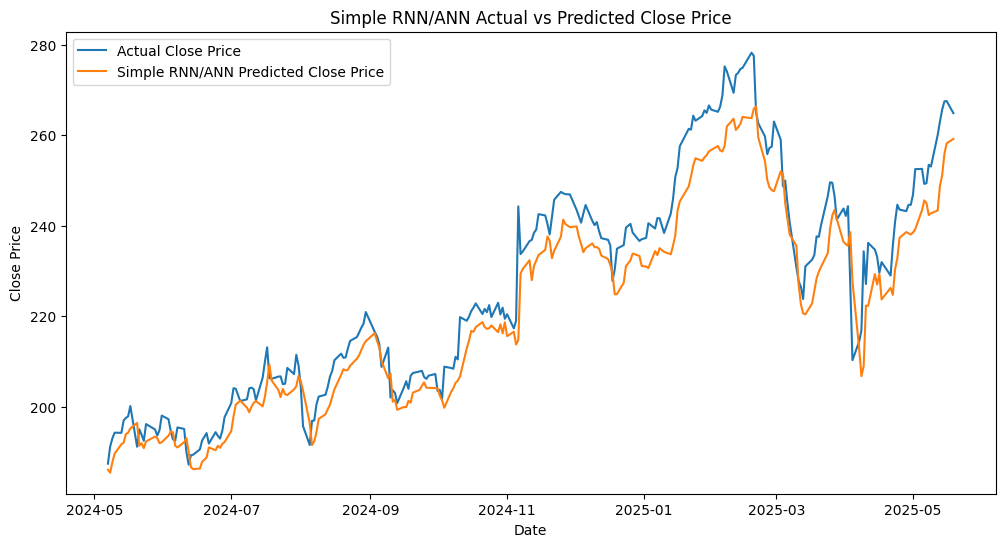

In [ ]:
rnn_predictions_scaled = rnn_model.predict(X_test_rnn_ann)

# Inverse transform the predictions and actual values
rnn_predictions_original_scale = scaler.inverse_transform(np.concatenate((np.zeros((len(rnn_predictions_scaled), scaled_data.shape[1]-1)), rnn_predictions_scaled), axis=1))[:, -1]
y_test_original_scale_rnn = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test_rnn_ann), scaled_data.shape[1]-1)), y_test_rnn_ann.reshape(-1, 1)), axis=1))[:, -1]


plt.figure(figsize=(12, 6))
# Adjust the date index for plotting the test set
test_dates_rnn = df['Date'].iloc[train_size_rnn_ann + sequence_length_rnn_ann:].values

plt.plot(test_dates_rnn, y_test_original_scale_rnn, label='Actual Close Price')
plt.plot(test_dates_rnn, rnn_predictions_original_scale, label='Simple RNN/ANN Predicted Close Price')
plt.title('Simple RNN/ANN Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error

# Prepare data for LSTM (using all relevant numerical features)
# Use the scaled data you already created
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Volume', 'Close']])

# Function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), :])
        y.append(data[i + sequence_length, -1]) # Predict the 'Close' price of the next step
    return np.array(X), np.array(y)

sequence_length = 60 # Define the length of the time sequence (e.g., 60 days)

# Create sequences from the scaled data
X, y = create_sequences(scaled_data, sequence_length)

# Time-based split (e.g., 80% for training, 20% for testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Reshape data for LSTM (samples, time steps, features)
# X_train and X_test are already in this shape from create_sequences

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
lstm_loss = lstm_model.evaluate(X_test, y_test, verbose=0)
lstm_rmse = np.sqrt(lstm_loss) # Calculate RMSE from MSE

print(f'LSTM RMSE: {lstm_rmse}')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0156 - val_loss: 0.0209
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0018 - val_loss: 0.0081
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0013 - val_loss: 0.0058
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 9.8693e-04 -

In [ ]:
# Collect RMSE values from each model
# (Assuming you stored the RMSE values from the previous steps)
model_comparison = {
    'ARIMA': arima_rmse, # Use the calculated RMSE
    'SARIMA': sarima_rmse, # Use the calculated RMSE
    'Prophet': prophet_rmse, # Use the calculated RMSE
    'LSTM': lstm_rmse, # Use the calculated RMSE
    'KNN': knn_rmse,         # Add KNN RMSE
    'Linear Regression': lr_rmse, # Add Linear Regression RMSE
    'Simple RNN/ANN': rnn_rmse # Add Simple RNN/ANN RMSE
}

print("\nModel Comparison (RMSE):")
for model, rmse in model_comparison.items():
    print(f'{model}: {rmse}')


Model Comparison (RMSE):
ARIMA: 54.168536147117486
SARIMA: 35.92213540760873
Prophet: 33.57442917523464
LSTM: 0.033390123394892245
KNN: 40.163804326254855
Linear Regression: 3.9973556222395783
Simple RNN/ANN: 0.03455129823842398


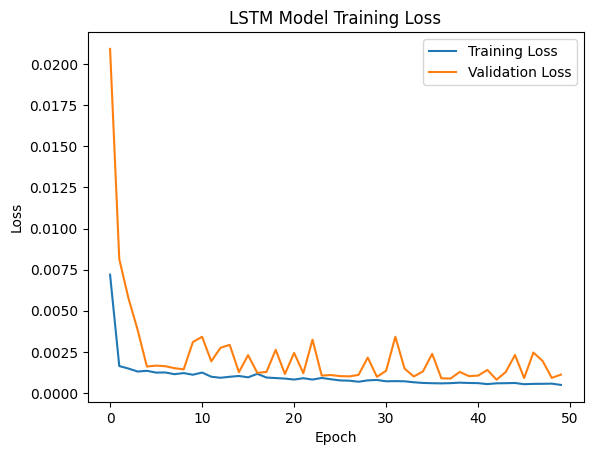

In [ ]:
# Visualize training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions and inverse transform for comparison
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform the predictions and actual values
# You need to create a dummy array with zeros for features other than 'Close'
# to inverse transform correctly with the scaler that was fitted on all features
dummy_array_predictions = np.zeros((len(lstm_predictions), scaled_data.shape[1]))
dummy_array_predictions[:, -1] = lstm_predictions.flatten()
lstm_predictions_original_scale = scaler.inverse_transform(dummy_array_predictions)[:, -1]

dummy_array_test = np.zeros((len(y_test), scaled_data.shape[1]))
dummy_array_test[:, -1] = y_test.flatten()
y_test_original_scale = scaler.inverse_transform(dummy_array_test)[:, -1]


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


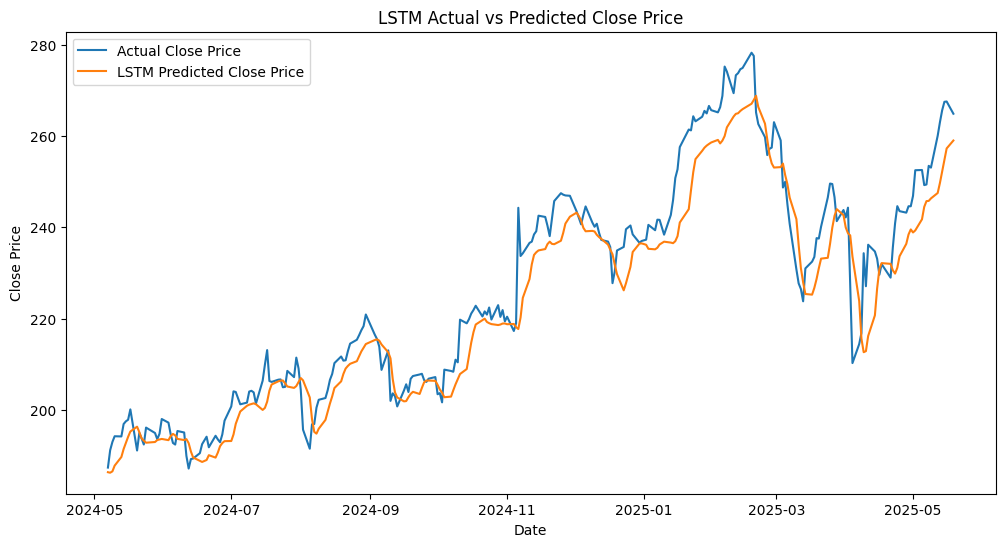

In [ ]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df.iloc[train_size + sequence_length:]['Date'], y_test_original_scale, label='Actual Close Price')
plt.plot(df.iloc[train_size + sequence_length:]['Date'], lstm_predictions_original_scale, label='LSTM Predicted Close Price')
plt.title('LSTM Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# Ensure df is loaded and 'Date' is in datetime format if you haven't already
# (Assuming df is still available from your previous cells)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])


# Retrain the model on the full dataset
# Prepare data for LSTM (using all relevant numerical features) for the full dataset
scaler_full = MinMaxScaler(feature_range=(0, 1))
# Fit the scaler on the entire dataset before splitting
scaled_data_full = scaler_full.fit_transform(df[['Open', 'High', 'Low', 'Volume', 'Close']])

# Function to create sequences for LSTM (same as before)
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), :])
        y.append(data[i + sequence_length, -1]) # Predict the 'Close' price of the next step
    return np.array(X), np.array(y)

sequence_length = 60 # Define the length of the time sequence (e.g., 60 days)

# Create sequences from the full scaled data
X_full, y_full = create_sequences(scaled_data_full, sequence_length)


In [ ]:
# Reshape data for LSTM (samples, time steps, features)
# X_full is already in this shape from create_sequences

# Define and Compile the LSTM model (same architecture as before)
lstm_model_full = Sequential()
lstm_model_full.add(LSTM(units=50, return_sequences=True, input_shape=(X_full.shape[1], X_full.shape[2])))
lstm_model_full.add(Dropout(0.2))
lstm_model_full.add(LSTM(units=50))
lstm_model_full.add(Dropout(0.2))
lstm_model_full.add(Dense(units=1))

lstm_model_full.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the full dataset
print("Training LSTM model on the full dataset...")
lstm_model_full.fit(X_full, y_full, epochs=50, batch_size=32, verbose=1) # Removed validation data for full training

print("LSTM model trained on the full dataset.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Training LSTM model on the full dataset...
Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0527
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0036
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0036
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0026
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0028
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0022
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0021
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0022
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0018
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0019
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0023
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0017
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0020
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0018
Epoch 15/50
41/41 ━━━━━━━━━━

In [ ]:
# Make Future Predictions

# Get the last 'sequence_length' days from the dataset to use as the starting point for prediction
last_sequence = scaled_data_full[-sequence_length:].reshape(1, sequence_length, scaled_data_full.shape[1])

num_future_steps = 30 # Number of future days to predict

future_predictions_scaled = []
current_sequence = last_sequence

for _ in range(num_future_steps):
    # Predict the next step
    next_prediction_scaled = lstm_model_full.predict(current_sequence)[0, 0]
    future_predictions_scaled.append(next_prediction_scaled)

    # Prepare the input for the next prediction
    # We need to remove the oldest data point and add the new prediction
    # Create a dummy prediction array to append (need to include all features, set others to 0 or a sensible value)
    next_step_all_features = np.zeros((1, scaled_data_full.shape[1]))
    next_step_all_features[0, -1] = next_prediction_scaled # Place the prediction in the 'Close' column

    # Reshape for concatenation
    next_step_all_features = next_step_all_features.reshape(1, 1, scaled_data_full.shape[1])

    # Update the current sequence: remove the first element, add the new prediction
    current_sequence = np.concatenate((current_sequence[:, 1:, :], next_step_all_features), axis=1)


# Inverse transform the future predictions to the original scale
dummy_array_future_predictions = np.zeros((len(future_predictions_scaled), scaled_data_full.shape[1]))
dummy_array_future_predictions[:, -1] = future_predictions_scaled
future_predictions_original_scale = scaler_full.inverse_transform(dummy_array_future_predictions)[:, -1]

# Generate future dates
last_date = df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_future_steps, freq='D')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━

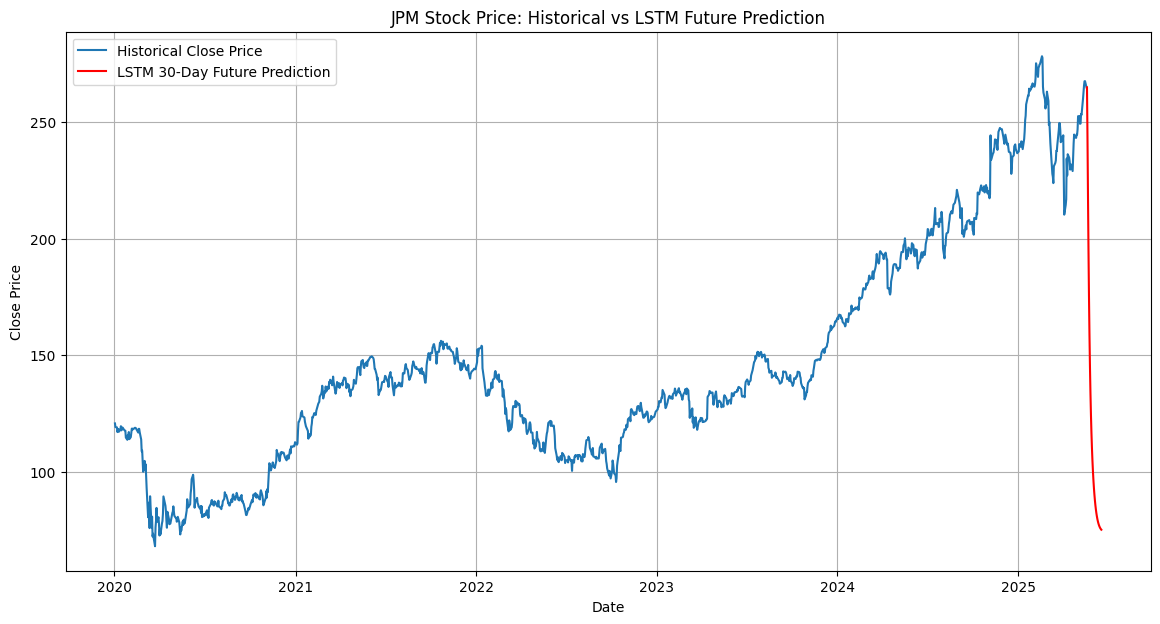

In [ ]:
# Visualize Future Predictions

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Historical Close Price')
plt.plot(future_dates, future_predictions_original_scale, label=f'LSTM {num_future_steps}-Day Future Prediction', color='red')
plt.title('JPM Stock Price: Historical vs LSTM Future Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
